In [1]:
import tsplib95
import numpy as np
import matplotlib.pyplot as plt
import time
from numba import njit
from numba import jitclass
import pandas as pd
import itertools
import urllib.request

%matplotlib inline

# Objective func

In [2]:
@njit
def tsp_objective_function(p,graph):
    s = 0.0
    for i in range(len(p)):
        s += graph[p[i-1], p[i]]
    return s

In [3]:
@njit
def qap_objective_function(p,A,B):
    s = 0.0
    for i in range(A.shape[0]):
        for j in range(A.shape[1]):
            s += A[i,j] * B[p[i],p[j]]
    return s

# Berlin instance

In [86]:
# BERLIN52

n = 52
print('Problem size: %d' % n)

coords = np.array([565.0, 575.0, 25.0, 185.0, 345.0, 750.0, 945.0, 685.0, 845.0, 655.0, 880.0, 660.0, 25.0, 230.0, 525.0, 1000.0, 580.0, 1175.0, 650.0, 1130.0, 1605.0, 620.0, 1220.0, 580.0, 1465.0, 200.0, 1530.0, 5.0, 845.0, 680.0, 725.0, 370.0, 145.0, 665.0, 415.0, 635.0, 510.0, 875.0, 560.0, 365.0, 300.0, 465.0, 520.0, 585.0, 480.0, 415.0, 835.0, 625.0, 975.0, 580.0, 1215.0, 245.0, 1320.0, 315.0, 1250.0, 400.0, 660.0, 180.0, 410.0, 250.0, 420.0, 555.0, 575.0, 665.0, 1150.0, 1160.0, 700.0, 580.0, 685.0, 595.0, 685.0, 610.0, 770.0, 610.0, 795.0, 645.0, 720.0, 635.0, 760.0, 650.0, 475.0, 960.0, 95.0, 260.0, 875.0, 920.0, 700.0, 500.0, 555.0, 815.0, 830.0, 485.0, 1170.0, 65.0, 830.0, 610.0, 605.0, 625.0, 595.0, 360.0, 1340.0, 725.0, 1740.0, 245.0])
coords = coords.reshape(n, 2)

A = np.empty((n, n))
for i in range(n):
    for j in range(n):
        A[i, j] = np.sqrt(((coords[i, :] - coords[j, :])**2).sum())
print('Distance matrix:\n', A)

p = [0, 48, 31, 44, 18, 40,  7,  8,  9, 42, 32, 50, 10, 51, 13, 12, 46, 25, 26, 27, 11, 24,  3,  5, 14,  4, 23, 47, 37, 36, 39, 38, 35, 34, 33, 43, 45, 15, 28, 49, 19, 22, 29,  1,  6, 41, 20, 16,  2, 17, 30, 21]
print('Optimal solution:\n', p)

Problem size: 52
Distance matrix:
 [[   0.          666.10809934  281.11385594 ...  217.08293346
   789.38267019 1220.46097848]
 [ 666.10809934    0.          649.32657423 ...  596.25917184
  1421.55724471 1716.04924172]
 [ 281.11385594  649.32657423    0.         ...  463.24939288
   995.3140208  1483.59361012]
 ...
 [ 217.08293346  596.25917184  463.24939288 ...    0.
   829.60834133 1150.76061803]
 [ 789.38267019 1421.55724471  995.3140208  ...  829.60834133
     0.          624.81997407]
 [1220.46097848 1716.04924172 1483.59361012 ... 1150.76061803
   624.81997407    0.        ]]
Optimal solution:
 [0, 48, 31, 44, 18, 40, 7, 8, 9, 42, 32, 50, 10, 51, 13, 12, 46, 25, 26, 27, 11, 24, 3, 5, 14, 4, 23, 47, 37, 36, 39, 38, 35, 34, 33, 43, 45, 15, 28, 49, 19, 22, 29, 1, 6, 41, 20, 16, 2, 17, 30, 21]


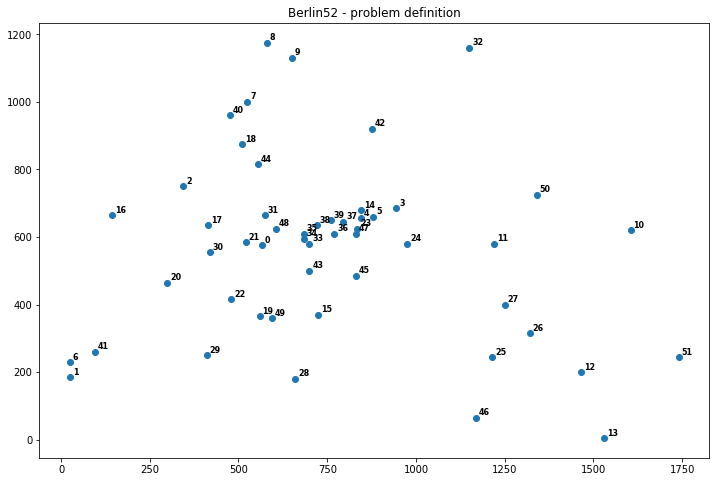

In [87]:
plt.figure(figsize=(12,8))

plt.plot(coords[:, 0], coords[:, 1], 'o')

for i in range(n):
    plt.text(coords[i, 0]+8, coords[i, 1]+8, str(i), fontdict={'weight':'bold', 'size':8})

plt.title('Berlin52 - problem definition')

plt.show()

<Figure size 864x576 with 0 Axes>

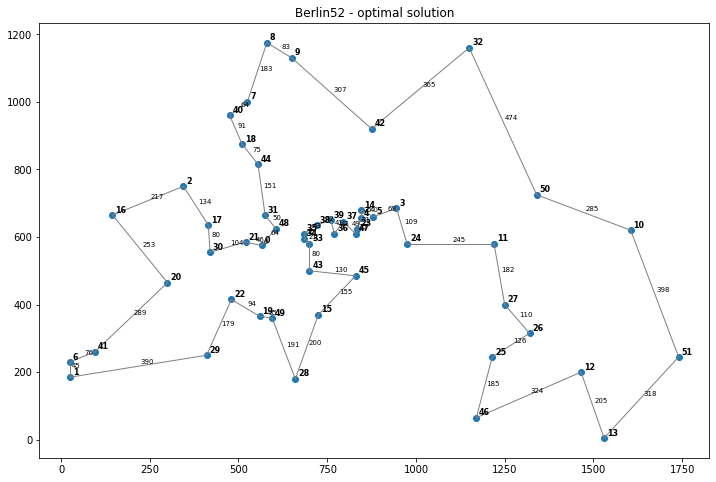

In [88]:
from matplotlib.lines import Line2D

route = p

plt.figure(figsize=(12,8))
fig, ax = plt.subplots(figsize=(12,8))

plt.plot(coords[:, 0], coords[:, 1], 'o')

for i in range(n):
    plt.text(coords[i, 0]+8, coords[i, 1]+8, str(i), fontdict={'weight':'bold', 'size':8})

ax.add_line(Line2D(
    [coords[0, 0], coords[route[0], 0]],
    [coords[0, 1], coords[route[0], 1]],
    linewidth=1, color='gray'))
plt.text((coords[0, 0] + coords[route[0], 0])/2 + 6,
         (coords[0, 1] + coords[route[0], 1])/2 + 6,
         '%d' % A[0, route[0]], fontdict={'weight':'normal', 'size':7})
for i in range(1, len(route)):
    ax.add_line(Line2D(
        [coords[route[i-1], 0], coords[route[i], 0]],
        [coords[route[i-1], 1], coords[route[i], 1]],
        linewidth=1, color='gray'))
    plt.text((coords[route[i-1], 0] + coords[route[i], 0])/2 + 6,
             (coords[route[i-1], 1] + coords[route[i], 1])/2 + 6,
             '%d' % A[route[i-1], route[i]], fontdict={'weight':'normal', 'size':7})
ax.add_line(Line2D(
    [coords[route[-1], 0], coords[0, 0]],
    [coords[route[-1], 1], coords[0, 1]],
    linewidth=1, color='gray'))
plt.text((coords[route[-1], 0] + coords[0, 0])/2 + 6,
         (coords[route[-1], 1] + coords[0, 1])/2 + 6,
         '%d' % A[route[-1], 0], fontdict={'weight':'normal', 'size':7})

plt.title('Berlin52 - optimal solution')

plt.show()

In [89]:
print(tsp_objective_function(p,A), p)

7544.365901904086 [0, 48, 31, 44, 18, 40, 7, 8, 9, 42, 32, 50, 10, 51, 13, 12, 46, 25, 26, 27, 11, 24, 3, 5, 14, 4, 23, 47, 37, 36, 39, 38, 35, 34, 33, 43, 45, 15, 28, 49, 19, 22, 29, 1, 6, 41, 20, 16, 2, 17, 30, 21]


/Users/kacperszufnarowski/anaconda3/lib/python3.7/site-packages/numba/ir_utils.py:2030: NumbaPendingDeprecationWarning: 
Encountered the use of a type that is scheduled for deprecation: type 'reflected list' found for argument 'p' of function 'tsp_objective_function'.

For more information visit http://numba.pydata.org/numba-doc/latest/reference/deprecation.html#deprecation-of-reflection-for-list-and-set-types

File "<ipython-input-84-e96a107dc107>", line 2:
@njit
def tsp_objective_function(p,graph):
^

  warnings.warn(NumbaPendingDeprecationWarning(msg, loc=loc))


In [90]:
t0 = time.time()

T = 1000000

permutations = np.empty((T, n), dtype=np.int64)
costs = np.zeros(T)
for i in range(T):
    permutations[i, :] = np.random.permutation(n)
    costs[i] = tsp_objective_function(permutations[i, :],A)

print(time.time() - t0)

p = permutations[costs.argmin(), :]
print(tsp_objective_function(p,A), p)

5.018367052078247
21793.617036389216 [39 24  7 16  6 22 30 46 26 10 47 25 27 42  2 38 21 36 11  3 49 23  0  4
 15 50 14 35 34 18  8  9 37 48 28 33 43 40 32 12 51 13  1 17 31 44 41 29
 19 45 20  5]


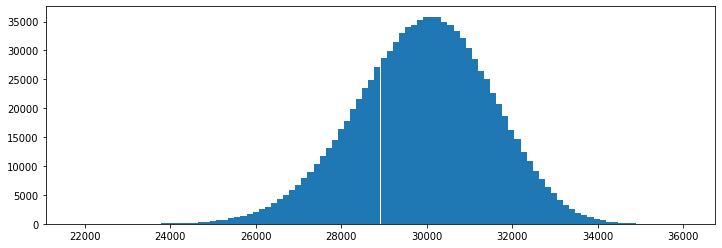

29913.874214212912 1580.804841393427


In [91]:
plt.figure(figsize=(12,4))
plt.hist(costs, bins=100)
plt.show()

print(costs.mean(), costs.std())

In [92]:
def random_neighbor(p, radius):
    q = p.copy()
    for r in range(radius):
        i, j = np.random.choice(n, 2, replace=False)
        q[i], q[j] = q[j], q[i]
    return q

In [93]:
T = 500000
radius = 1
alpha = 1.0

t0 = time.time()

p = np.random.permutation(n)
p_cost = tsp_objective_function(p,A)
costs = np.zeros(T)
for t in range(T):
    q = random_neighbor(p, radius)
    q_cost = tsp_objective_function(q,A)
    if(q_cost < p_cost):
        p, p_cost = q, q_cost
    elif(np.random.rand() < np.exp(- alpha * (q_cost - p_cost) * t/T)):
        p, p_cost = q, q_cost
    costs[t] = p_cost

print(time.time() - t0, costs.min())

12.029557943344116 8874.199923159045


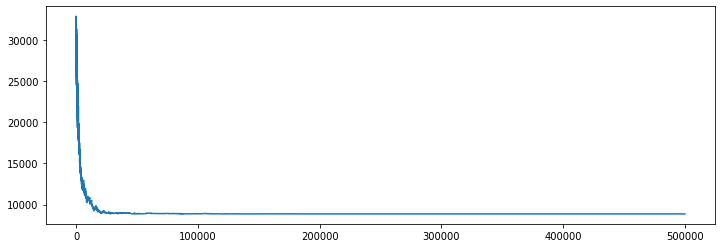

In [94]:
plt.figure(figsize=(12,4))
plt.plot(costs)
plt.show()

# Cross func

In [4]:
@njit
def find(elem,arr):
    for i in range(len(arr)):
        if elem == arr[i]:
            return True
    return False

@njit
def PMX(parent_f, parent_s):
    split = np.random.choice(len(parent_f),2,False)
    i,j = split.min(),split.max()
    #childrens
    child_f = np.zeros((len(parent_f)),dtype = np.int64)
    child_s = np.zeros((len(parent_f)),dtype = np.int64)
    #construct mappings
    map_f = np.arange(len(parent_f))
    map_s = np.arange(len(parent_s))
    map_f[parent_s[i:j+1]] = parent_f[i:j+1]
    map_s[parent_f[i:j+1]] = parent_s[i:j+1]
    #swap
    child_f[i:j+1] = parent_s[i:j+1]
    child_s[i:j+1] = parent_f[i:j+1]
    for left in range(i):
        change = parent_f[left]
        while find(change,parent_s[i:j+1]):
            change = map_f[change]
        child_f[left] = change
        change = parent_s[left]
        while find(change,parent_f[i:j+1]):
            change = map_s[change]
        child_s[left] = change
    for right in range(j+1,len(parent_f)):
        change = parent_f[right]
        while find(change,parent_s[i:j+1]):
            change = map_f[change]
        child_f[right] = change
        change = parent_s[right]
        while find(change,parent_f[i:j+1]):
            change = map_s[change]
        child_s[right] = change
    return child_f, child_s

@njit
def OX(parent_f,parent_s):
    split = np.random.choice(len(parent_f),2,False)
    i,j = split.min(),split.max()
    child_f = np.zeros((len(parent_f)),dtype = np.int64)
    child_s = np.zeros((len(parent_f)),dtype = np.int64)
    child_f[i:j+1] = parent_f[i:j+1]
    child_s[i:j+1] = parent_s[i:j+1]
    pos = j+1
    if pos == len(parent_s):
        pos = 0
    for ite in range(j+1,len(parent_f)):
        if not find(parent_s[ite],parent_f[i:j+1]):
            child_f[pos] = parent_s[ite]
            pos+=1
            pos%=len(parent_f)
    for ite in range(j+1):
        if not find(parent_s[ite],parent_f[i:j+1]):
            child_f[pos] = parent_s[ite]
            pos+=1
            pos%=len(parent_f)
    pos = j+1
    if pos == len(parent_s):
        pos = 0
    for ite in range(j+1,len(parent_s)):
        if not find(parent_f[ite],parent_s[i:j+1]):
            child_s[pos] = parent_f[ite]
            pos+=1
            pos%=len(parent_f)
    for ite in range(j+1):
        if not find(parent_f[ite],parent_s[i:j+1]):
            child_s[pos] = parent_f[ite]
            pos+=1
            pos%=len(parent_f)
    return child_f,child_s

# Replace func

In [5]:
@njit
def replace_mulambda(children_population,current_population,objective_values,children_objective_values,population_size):
    objective_values = np.hstack((objective_values, children_objective_values))
    current_population = np.vstack((current_population, children_population))

    I = np.argsort(objective_values)
    new_population = current_population[I[:population_size], :].copy()
    new_objective_values = objective_values[I[:population_size]].copy()
    
    return new_population,new_objective_values

# Mutate funcs

In [6]:
@njit
def reverse_sequence_mutation(p):
    a = np.random.choice(len(p), 2, False)
    i, j = a.min(), a.max()
    q = p.copy()
    q[i:j+1] = q[i:j+1][::-1]
    return q

@njit
def random_swap(p):
    a = np.random.choice(len(p),2,False)
    i,j = a.min(),a.max()
    q = p.copy()
    q[i],q[j] = q[j],q[i]
    return q

def swap(p,mask,perm):
    q = p.copy()
    for i in range(len(mask)):
        q[mask[i]] = p[perm[i]]
    return q


def generate_permutations(p):
    return list(itertools.permutations(p))

def generate_masks(p,k):
    return list(itertools.combinations(p, k))

def k_perm_mutation(p,k,graph):
    best_score = tsp_objective_function(p,graph)
    best_individual = p.copy()
    for i in range(2,k):
        masks = generate_masks(p,i)
        for j in range(len(masks)):
            permutations = generate_permutations(masks[j])
            for k in range(len(permutations)):
                q = p.copy()
                q = swap(q,masks[j],permutations[k],)
                score = tsp_objective_function(q,graph)
                if score < best_score:
                    best_score = score
                    best_individual = q.copy()
    return best_individual
            

def k_perm_iter_mutation(p,k,graph):
    best_score = tsp_objective_function(p,graph)
    best_individual = p.copy()
    while True:
        q = k_perm_mutation(p,k,graph)
        score = tsp_objective_function(q,graph)
        if score < best_score:
            best_score = score
            best_individual = q.copy()
        else:
            break
    return best_individual

# General funcs

In [7]:
@njit
def random_population(population_size,chromosome_length):
    current_population = np.zeros((population_size,chromosome_length), dtype=np.int64)
    for i in range(population_size):
        current_population[i, :] = np.random.permutation(chromosome_length)

    return current_population

@njit
def evaluate_population(population,population_size,eval_function,graph):
    objective_values = np.zeros(population_size)
    for i in range(population_size):
        objective_values[i] = eval_function(population[i, :],graph)
        
    return objective_values

@njit
def fitness_evaluate(objective_values,population_size):
    fitness_values = objective_values.max() - objective_values
    if fitness_values.sum() > 0:
        fitness_values = fitness_values / fitness_values.sum()
    else:
        fitness_values = np.ones(population_size) / population_size
    return fitness_values

@njit
def cross_over(current_population,parent_indices,population_size,crossover_probability,cross_function,chromosome_length):
    children_population = np.zeros((population_size, chromosome_length), dtype=np.int64)
    
    for i in range(int(population_size/2)):
        if np.random.random() < crossover_probability:
            children_population[2*i, :], children_population[2*i+1, :] = cross_function(current_population[parent_indices[2*i], :].copy(), current_population[parent_indices[2*i+1], :].copy())
        else:
            children_population[2*i, :], children_population[2*i+1, :] = current_population[parent_indices[2*i], :].copy(), current_population[parent_indices[2*i+1]].copy()
    if np.mod(population_size, 2) == 1:
        children_population[-1, :] = current_population[parent_indices[-1], :]
    
    return children_population

@njit
def evaluate_population_qap(population,population_size,eval_function,graph,graph_s):
    objective_values = np.zeros(population_size)
    for i in range(population_size):
        objective_values[i] = eval_function(population[i, :],graph,graph_s)
        
    return objective_values

# Algo class

In [8]:
class SGA():
    def __init__(self,population_size,chromosome_length,crossover_probability,mutation_probability,number_of_iterations):
        self.population_size = population_size
        self.chromosome_length = chromosome_length
        self.crossover_probability = crossover_probability
        self.mutation_probability = mutation_probability
        self.number_of_iterations = number_of_iterations
        self.best_individual = np.empty((1,chromosome_length))
        self.best_cost = np.Inf

    def run(self,mutate_function,crossover_function,replace_function,objective_function,graph,bonus_mutation = 0):
        time0 = time.time()
        
        costs = np.zeros(self.number_of_iterations)

        # generating an initial population
        current_population = random_population(self.population_size,self.chromosome_length)

        # evaluating the objective function on the current population
        objective_values = evaluate_population(current_population,self.population_size,objective_function,graph)
        
        for t in range(self.number_of_iterations):
            costs[t] = objective_values.min()
            if costs[t] < self.best_cost:
                self.best_cost = costs[t]
                self.best_individual = current_population[np.argmin(objective_values),:]
            # selecting the parent indices by the roulette wheel method
            fitness_values = fitness_evaluate(objective_values,self.population_size)

            #roullete method
            parent_indices = np.random.choice(self.population_size, self.population_size, True, fitness_values).astype(np.int64)

            # creating the children population
            children_population = cross_over(current_population,parent_indices,self.population_size,self.crossover_probability,crossover_function,self.chromosome_length)

            # mutating the children population
            for i in range(self.population_size):
                if np.random.random() < self.mutation_probability:
                    children_population[i, :] = mutate_function(children_population[i, :])
            
            if bonus_mutation != 0:
                for i in range(self.population_size):
                    if np.random.random() < bonus_mutation:
                        children_population[i, :] = k_perm_mutation(children_population[i,:],3,graph)
            # evaluating the objective function on the children population
            children_objective_values = evaluate_population(children_population,self.population_size,objective_function,graph)

            # replacing the current population
            current_population,objective_values = replace_function(children_population,current_population,objective_values,children_objective_values,self.population_size)
        return costs
    
    def run_qap(self,mutate_function,crossover_function,replace_function,objective_function,graph,graph_s,bonus_mutation = 0):
        time0 = time.time()
        
        costs = np.zeros(self.number_of_iterations)

        # generating an initial population
        current_population = random_population(self.population_size,self.chromosome_length)

        # evaluating the objective function on the current population
        objective_values = evaluate_population_qap(current_population,self.population_size,objective_function,graph,graph_s)
        
        for t in range(self.number_of_iterations):
            costs[t] = objective_values.min()
            if costs[t] < self.best_cost:
                self.best_cost = costs[t]
                self.best_individual = current_population[np.argmin(objective_values),:]
            # selecting the parent indices by the roulette wheel method
            fitness_values = fitness_evaluate(objective_values,self.population_size)

            #roullete method
            parent_indices = np.random.choice(self.population_size, self.population_size, True, fitness_values).astype(np.int64)

            # creating the children population
            children_population = cross_over(current_population,parent_indices,self.population_size,self.crossover_probability,crossover_function,self.chromosome_length)

            # mutating the children population
            for i in range(self.population_size):
                if np.random.random() < self.mutation_probability:
                    children_population[i, :] = mutate_function(children_population[i, :])
            
            if bonus_mutation != 0:
                for i in range(self.population_size):
                    if np.random.random() < bonus_mutation:
                        children_population[i, :] = k_perm_mutation(children_population[i,:],3,graph)
            # evaluating the objective function on the children population
            children_objective_values = evaluate_population_qap(children_population,self.population_size,objective_function,graph,graph_s)

            # replacing the current population
            current_population,objective_values = replace_function(children_population,current_population,objective_values,children_objective_values,self.population_size)
        return costs

# Best known solutions
- bayg29 : 1610
- bays29 : 2020
- kroA100 : 21282
- kroA150 : 26524
- kroA200 : 29368
- Berlin52 : 7544.365901904086

In [100]:
def start_problem(name):
    problem = tsplib95.load_problem(name)
    print(problem.type)
    print(problem.dimension)
    edges = list(problem.get_edges())
    n = problem.dimension
    graph = np.empty((n,n))
    for edge in edges:
        graph[edge[0]-1,edge[1]-1] = problem.wfunc(edge[0],edge[1])
    return n,graph

def solve_problem(n,graph,pop_size,num_of_iter):
    algo = SGA(pop_size,n,0.95,0.25,num_of_iter)
    stat = np.zeros(100)
    for i in range(100):
        costs = algo.run(reverse_sequence_mutation,PMX,replace_mulambda,tsp_objective_function,graph)
        stat[i] = costs.min()
    plt.figure(figsize=(12,4))
    plt.hist(stat, bins=100)
    plt.show()
    print(np.mean(stat),np.std(stat))
    print(stat.min())

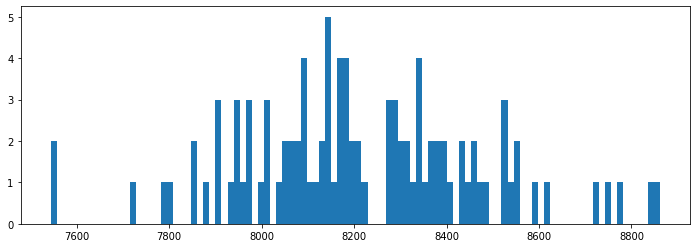

8211.69871844867 255.7283929946039
7544.365901904086


In [101]:
solve_problem(52,A,500,250)

In [103]:
n,graph = start_problem("lista02/bayg29.tsp")

TSP
29


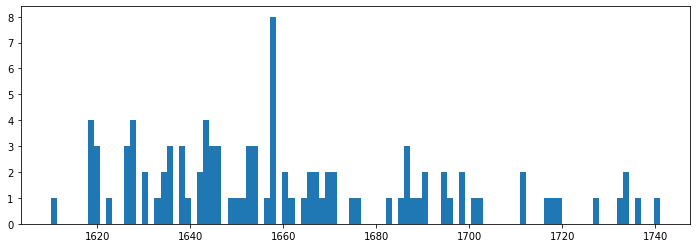

1661.55 31.746613992676444
1610.0


In [104]:
solve_problem(n,graph,500,250)

In [105]:
n,graph = start_problem("lista02/bays29.tsp")

TSP
29


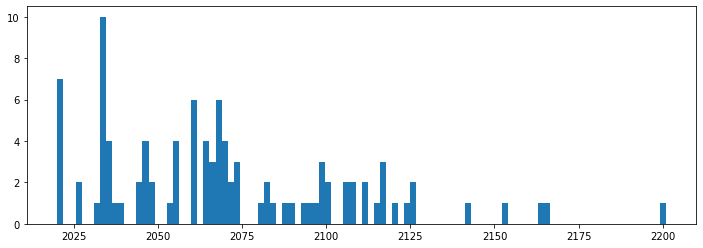

2070.25 36.48544230237589
2020.0


In [106]:
solve_problem(n,graph,500,250)

In [107]:
n,graph = start_problem("lista02/kroA100.tsp")

TSP
100


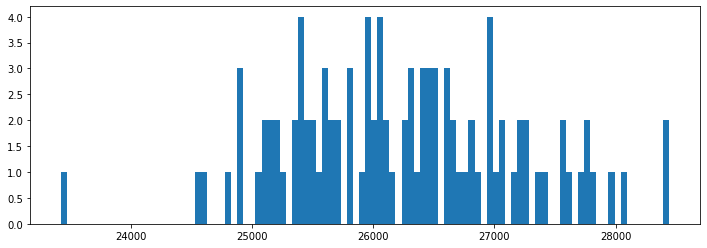

26239.94 929.6287196510228
23419.0


In [108]:
solve_problem(n,graph,500,250)

In [126]:
n,graph = start_problem("lista02/kroA150.tsp")

TSP
150


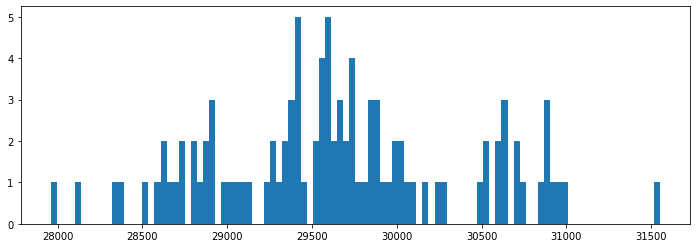

29646.32 722.9977853354738
27961.0


In [129]:
solve_problem(n,graph,1000,500)

TSP
200


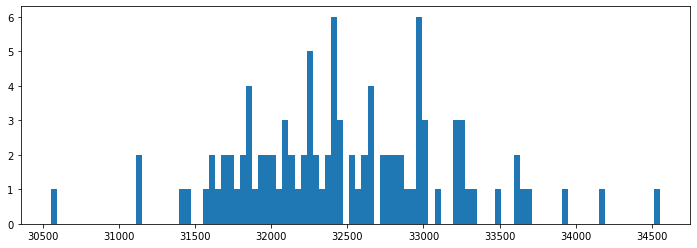

32479.18 675.6094490162197
30552.0


In [130]:
n,graph = start_problem("lista02/kroA200.tsp")
solve_problem(n,graph,2000,1000)

# OX modification

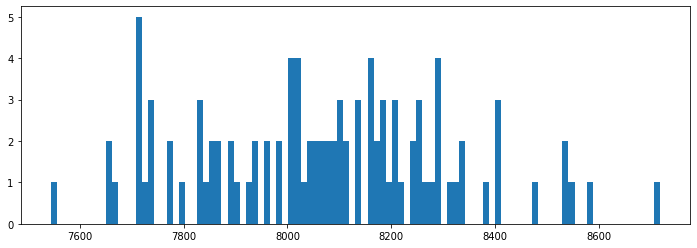

8071.171655171629 235.7122550991686
7544.365901904089


In [18]:
algo = SGA(500,52,0.95,0.25,250)
stat = np.zeros(100)
for i in range(100):
    costs = algo.run(reverse_sequence_mutation,OX,replace_mulambda,tsp_objective_function,A)
    stat[i] = costs.min()
plt.figure(figsize=(12,4))
plt.hist(stat, bins=100)
plt.show()
print(np.mean(stat),np.std(stat))
print(stat.min())

# Another mutation

Both of suggested mutations are horrible slow. Increasing k expotentially increase time complexity so I kept k on 3.
Nevertheless it is improvment in algorithm.

In [46]:
n,graph = start_problem("lista02/kroA100.tsp")

TSP
100


0.0
0.04
0.08
0.12
0.16
0.2
0.24
0.28
0.32
0.36
0.4
0.44
0.48
0.52
0.56
0.6
0.64
0.68
0.72
0.76
0.8
0.84
0.88
0.92
0.96


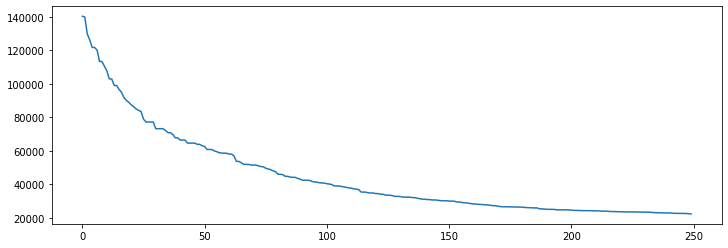

In [47]:
algo = SGA(500,n,0.95,0.25,250)
costs = algo.run(reverse_sequence_mutation,OX,replace_mulambda,tsp_objective_function,graph,0.05)
plt.figure(figsize=(12,4))
plt.plot(np.arange(250),costs)
plt.show()

In [48]:
algo.best_cost

22324.0

# QAP instances

Popularne instancje QAP wraz z dokładnym minimum funkcji celu:
- Nug12 12 578 (OPT) (12,7,9,3,4,8,11,1,5,6,10,2) 
- Nug14 14 1014 (OPT) (9,8,13,2,1,11,7,14,3,4,12,5,6,10) 
- Nug15 15 1150 (OPT) (1,2,13,8,9,4,3,14,7,11,10,15,6,5,12) 
- Nug16a 16 1610 (OPT) (9,14,2,15,16,3,10,12,8,11,6,5,7,1,4,13) 
- Nug16b 16 1240 (OPT) (16,12,13,8,4,2,9,11,15,10,7,3,14,6,1,5) 
- Nug17 17 1732 (OPT) (16,15,2,14,9,11,8,12,10,3,4,1,7,6,13,17,5) 
- Nug18 18 1930 (OPT) (10,3,14,2,18,6,7,12,15,4,5,1,11,8,17,13,9,16) 
- Nug20 20 2570 (OPT) (18,14,10,3,9,4,2,12,11,16,19,15,20,8,13,17,5,7,1,6) 
- Nug21 21 2438 (OPT) (4,21,3,9,13,2,5,14,18,11,16,10,6,15,20,19,8,7,1,12,17) 
- Nug22 22 3596 (OPT) (2,21,9,10,7,3,1,19,8,20,17,5,13,6,12,16,11,22,18,14,15) 
- Nug24 24 3488 (OPT) (17,8,11,23,4,20,15,19,22,18,3,14,1,10,7,9,16,21,24,12,6,13,5,2) 
- Nug25 25 3744 (OPT) (5,11,20,15,22,2,25,8,9,1,18,16,3,6,19,24,21,14,7,10,17,12,4,23,13) * 
- Nug27 27 5234 (OPT) (23,18,3,1,27,17,5,12,7,15,4,26,8,19,20,2,24,21,14,10,9,13,22,25,6,16,11) * 
- Nug28 28 5166 (OPT) (18,21,9,1,28,20,11,3,13,12,10,19,14,22,15,2,25,16,4,23,7,17,24,26,5,27,8,6) * 
- Nug30 30 6124 (OPT) (5 12 6 13 2 21 26 24 10 9 29 28 17 1 8 7 19 25 23 22 11 16 30 4 15 18 27 3 14 20)

In [9]:
def start_qap(problem_name):
    QAP_INSTANCE_URL = 'http://anjos.mgi.polymtl.ca/qaplib/data.d/' + problem_name
    qap_instance_file = urllib.request.urlopen(QAP_INSTANCE_URL)

    line = qap_instance_file.readline()
    n = int(line.decode()[:-1].split()[0])

    A = np.empty((n, n))
    qap_instance_file.readline()
    for i in range(n):
        line = qap_instance_file.readline()
        A[i, :] = list(map(int, line.decode()[:-1].split()))


    B = np.empty((n, n))
    qap_instance_file.readline()
    for i in range(n):
        line = qap_instance_file.readline()
        B[i, :] = list(map(int, line.decode()[:-1].split()))
    return n,A,B

In [11]:
def solve_qap(n,A,B,solution):
    algo = SGA(500,n,0.95,0.25,250)
    stat = np.zeros(100)
    for i in range(100):
        costs = algo.run_qap(reverse_sequence_mutation,OX,replace_mulambda,qap_objective_function,A,B,0.05)
        stat[i] = costs.min()
    print(np.mean(stat),np.std(stat))
    print(stat.min())
    print(abs(solution - stat.min())/solution)
    plt.figure(figsize=(12,4))
    plt.hist(stat, bins=20)
    plt.show()

nug12.dat
596.84 9.5589957631542
578.0
0.0


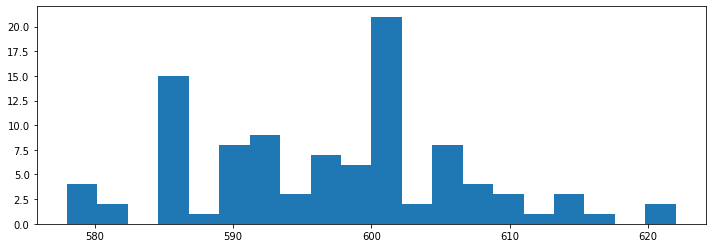

nug14.dat
1059.98 17.24063803923741
1014.0
0.0


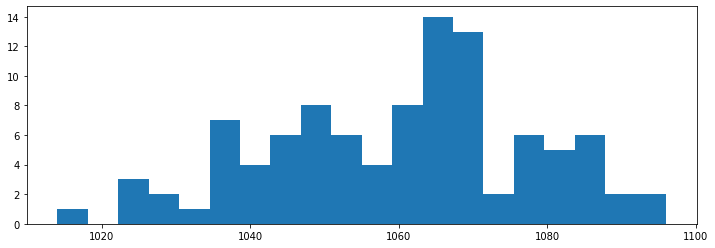

nug15.dat
1209.58 21.86375082185122
1150.0
0.0


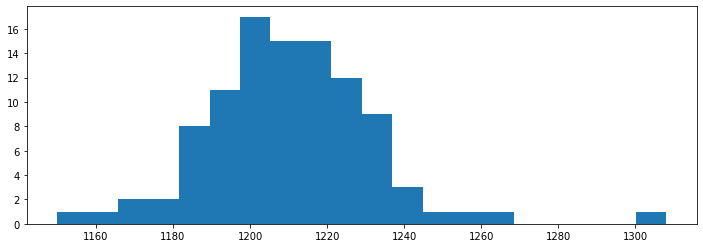

nug16a.dat
1703.04 26.302060755765883
1642.0
0.01987577639751553


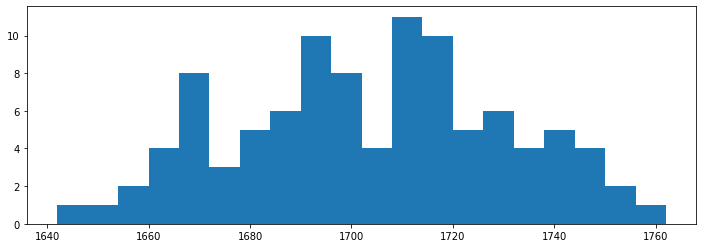

nug16b.dat
1309.5 26.638881357894892
1252.0
0.00967741935483871


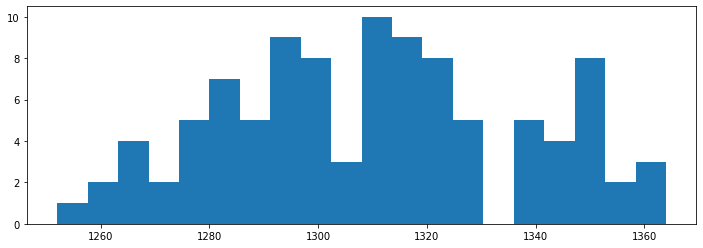

nug17.dat
1826.48 29.51354943072758
1768.0
0.020785219399538105


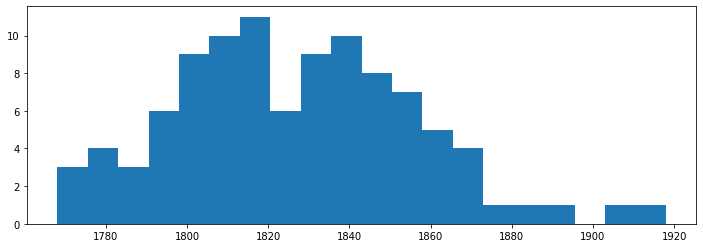

nug18.dat
2043.7 31.991717678174144
1962.0
0.016580310880829015


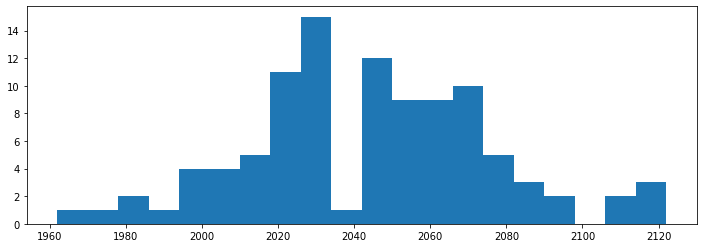

nug20.dat
2728.58 40.863964565372264
2582.0
0.004669260700389105


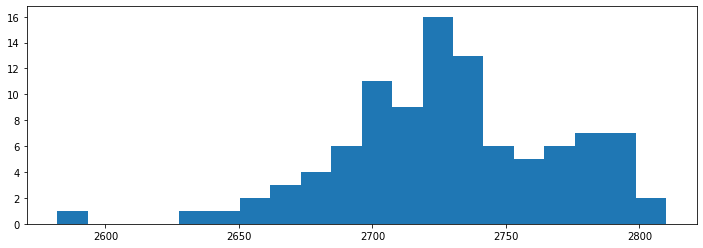

nug21.dat
2613.8 45.03021208033558
2502.0
0.026251025430680888


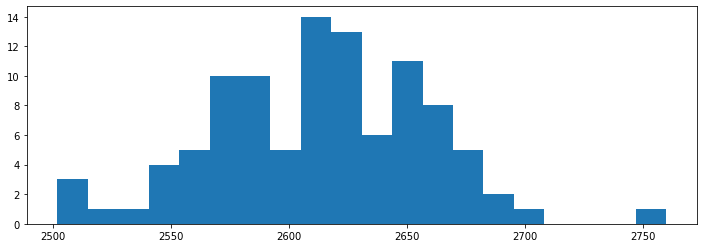

nug22.dat
3770.64 55.82750576552744
3636.0
0.011123470522803115


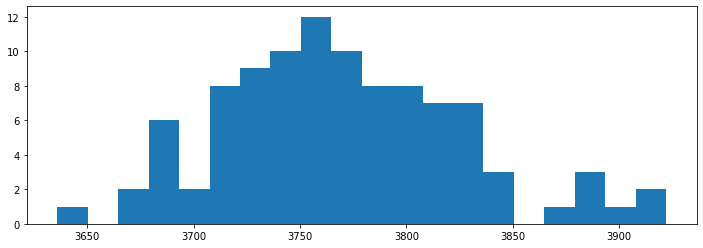

nug24.dat
3770.76 64.96693312755343
3606.0
0.0338302752293578


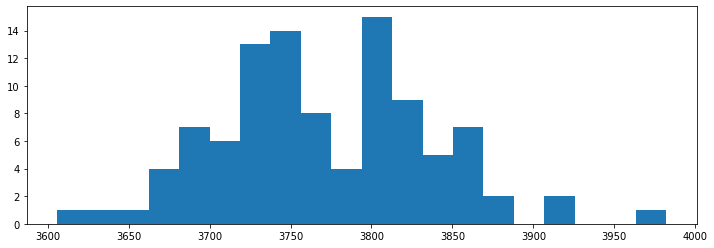

nug25.dat
4024.8 70.46360762833534
3830.0
0.022970085470085472


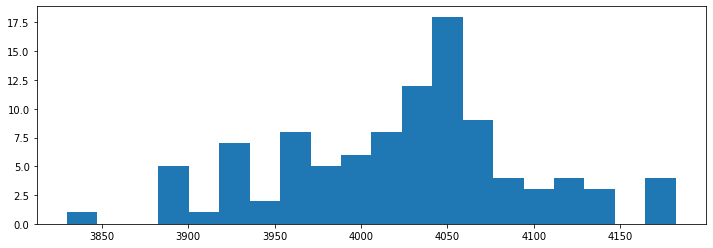

nug27.dat
5737.9 86.27971951739296
5538.0
0.0580817730225449


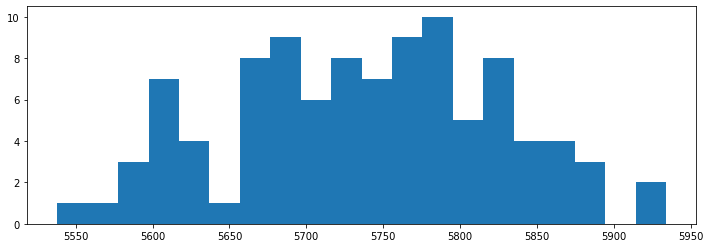

nug28.dat
5686.42 75.13310588548832
5492.0
0.06310491676345335


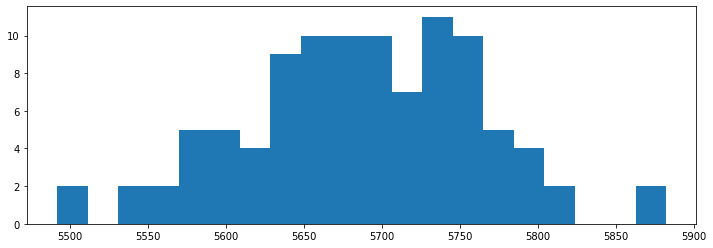

nug30.dat


ValueError: cannot copy sequence with size 20 to array axis with dimension 30

In [13]:
problems = ['nug12.dat','nug14.dat','nug15.dat','nug16a.dat','nug16b.dat','nug17.dat','nug18.dat','nug20.dat',
            'nug21.dat','nug22.dat','nug24.dat','nug25.dat','nug27.dat','nug28.dat','nug30.dat']

solutions = [578,1014,1150,1610,1240,1732,1930,2570,2438,3596,3488,3744,5234,5166,6124]

for i in range(len(problems)):
    print(problems[i])
    n,A,B = start_qap(problems[i])
    solve_qap(n,A,B,solutions[i])